In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

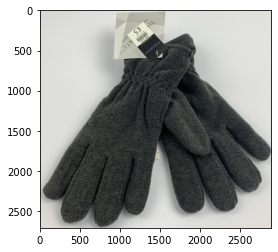

In [25]:
path = '/Users/yezhouli/Desktop/Python/GrabCut/assets/gloves.jpg'
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

In [26]:
mask = np.zeros(img.shape[:2], np.uint8)

# zeros(shape, dtype=float, order='C')，参数shape代表形状，(1,65)代表1行65列的数组，dtype:数据类型，可选参数，默认numpy.float64
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (1, 1, img.shape[1], img.shape[0])
# 函数原型：grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, mode=None)
# img - 输入图像
# mask-掩模图像，用来确定那些区域是背景，前景，可能是前景/背景等。可以设置为：cv2.GC_BGD,cv2.GC_FGD,cv2.GC_PR_BGD,cv2.GC_PR_FGD，或者直接输入 0,1,2,3 也行。
# rect - 包含前景的矩形，格式为 (x,y,w,h)
# bdgModel, fgdModel - 算法内部使用的数组. 你只需要创建两个大小为 (1,65)，数据类型为 np.float64 的数组。
# iterCount - 算法的迭代次数
# mode cv2.GC_INIT_WITH_RECT 或 cv2.GC_INIT_WITH_MASK，使用矩阵模式还是蒙板模式。
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 2, 2, ..., 2, 2, 2],
        [0, 2, 2, ..., 2, 2, 2],
        ...,
        [0, 2, 2, ..., 2, 2, 2],
        [0, 2, 2, ..., 2, 2, 2],
        [0, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[3.45135908e-01, 3.23676681e-02, 3.74463519e-01, 2.16380544e-02,
         2.26394850e-01, 2.21137306e+02, 2.24161658e+02, 2.23862176e+02,
         2.05138122e+02, 2.08270718e+02, 2.11872928e+02, 2.18575931e+02,
         2.21737345e+02, 2.21682426e+02, 1.88966942e+02, 1.92330579e+02,
         1.95239669e+02, 2.13020537e+02, 2.16995261e+02, 2.18713270e+02,
         1.76093989e+00, 2.08373379e-01, 6.75400682e-01, 2.08373379e-01,
         9.21016940e-01, 7.18135252e-01, 6.75400682e-01, 7.18135252e-01,
         7.48880238e-01, 1.72671655e+01, 1.63272489e+01, 1.91169989e+01,
         1.63272489e+01, 1.55223470e+01, 1.79570526e+01, 1.91169989e+01,
         1.79570526e+01, 2.14468914e+01, 1.23372824e+00, 3.35607535e-01,
         3.80608534e-01, 3.35607535e-01, 1.2

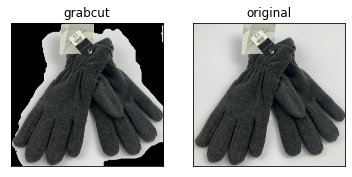

In [27]:
# np.where 函数是三元表达式 x if condition else y的矢量化版本
# result = np.where(cond,xarr,yarr)
# 当符合条件时是x，不符合是y，常用于根据一个数组产生另一个新的数组。
# | 是逻辑运算符or的另一种表现形式
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# mask2[:, :, np.newaxis] 增加维度
img = img * mask2[:, :, np.newaxis]

# 显示图片
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.show()